# Installing Packages and Prerequisite Dependencies

In [1]:
%pip install numpy
%pip install skimage
%pip install matplotlib
%pip install sklearn
%pip install pandas
%pip install tensorflow==2.10

Note: you may need to restart the kernel to use updated packages.
  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from setup import load_images, split as dataSplit;
from performance import printConfMtx;
from Models import Model;
import constants;
import numpy as np;
import pandas as pd;

# Data Preparation for Classification - stonefly dataset

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


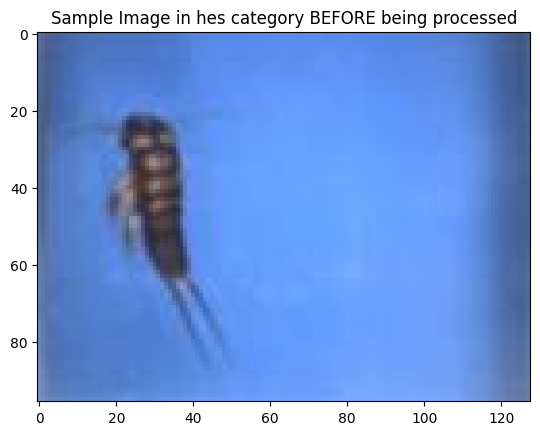

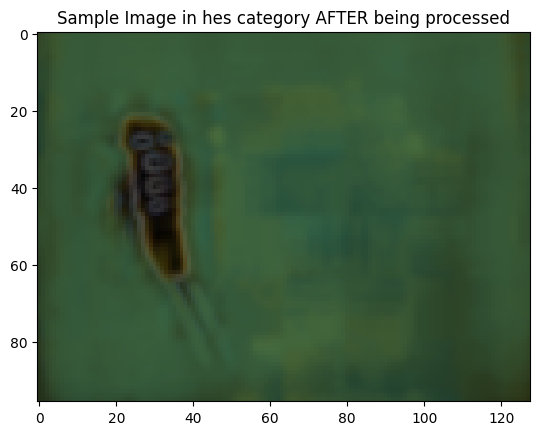

Total number of samples in the training set: 1089
Total number of labels in the training set: 1089
Unique labels in the training set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']
Total number of samples in the validation set: 273
Total number of labels in the validation set: 273
Unique labels in the validation set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [3]:
images, y = load_images(dataset=constants.STONEFLY, setName=constants.set0);
X_train, X_validation, y_train, y_validation = dataSplit(images, y);
# inspect the data
print(f"Total number of samples in the training set: {len(X_train)}");
print(f"Total number of labels in the training set: {len(y_train)}");
print(f"Unique labels in the training set: {np.unique(y_train)}");
print(f"Total number of samples in the validation set: {len(X_validation)}");
print(f"Total number of labels in the validation set: {len(y_validation)}");
print(f"Unique labels in the validation set: {np.unique(y_validation)}");

In [4]:
# save training set and validation set data for easier debugging
np.save("X_train.npy", X_train);
np.save("X_validation.npy", X_validation);
np.save("y_-train.npy", y_train);
np.save("y_validation.npy", y_validation);

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


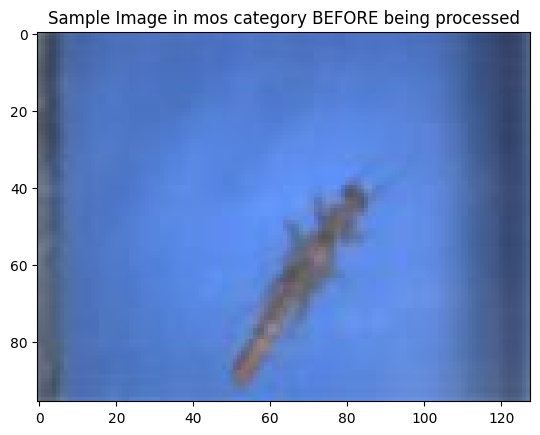

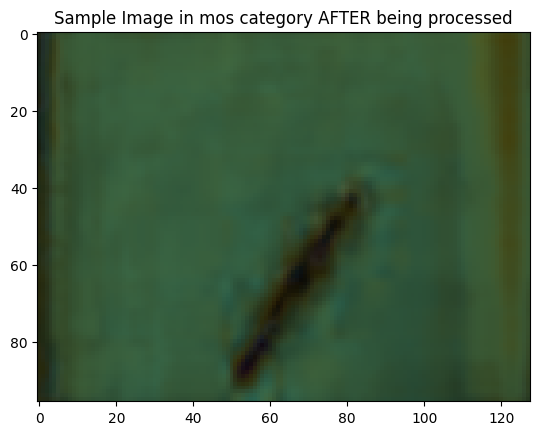

Total number of samples in the test set: 1480
Total number of labels in the test set: 1480
Unique labels in the test set: ['cal' 'dor' 'hes' 'iso' 'mos' 'pte' 'swe' 'yor' 'zap']


In [5]:
X_test, y_test = load_images(dataset=constants.STONEFLY, setName=constants.set1);
print(f"Total number of samples in the test set: {len(X_test)}");
print(f"Total number of labels in the test set: {len(y_test)}");
print(f"Unique labels in the test set: {np.unique(y_test)}");

In [6]:
# save the test set data for easier debugging
np.save("X_test.npy", X_test);
np.save("y_test.npy", y_test);

# Basic Transfer Learning: Classification

## ResNet Classification

In [7]:
# Load the data from .npy files
X_train = np.load("X_train.npy");
y_train = np.load("y_-train.npy");
X_validation = np.load("X_validation.npy");
y_validation = np.load("y_validation.npy");
X_test = np.load("X_test.npy");
y_test = np.load("y_test.npy");

### Understanding the Features

In [8]:
# Training set
images = pd.Series(y_train);
images.value_counts()

zap    178
dor    143
hes    136
iso    136
yor    134
cal    133
swe    123
pte     71
mos     35
Name: count, dtype: int64

In [9]:
# Validation set
images = pd.Series(y_validation);
images.value_counts()

zap    45
dor    36
yor    34
hes    34
iso    34
cal    33
swe    30
pte    18
mos     9
Name: count, dtype: int64

In [10]:
# Test set
images = pd.Series(y_test);
images.value_counts()

yor    290
hes    200
iso    200
dor    194
swe    185
cal    171
zap    150
pte     55
mos     35
Name: count, dtype: int64

### Load the Model

In [11]:
model = Model();
model.build_classifier();

INFO:tensorflow:Assets written to: ram://b348bfcd-2099-4743-9697-75b047ba6259/assets


INFO:tensorflow:Assets written to: ram://b348bfcd-2099-4743-9697-75b047ba6259/assets


INFO:tensorflow:Assets written to: ram://97c65516-4e5e-4826-9715-072b9906a0c3/assets


INFO:tensorflow:Assets written to: ram://97c65516-4e5e-4826-9715-072b9906a0c3/assets


Now let's observe a summary of our classifiers.

In [12]:
model.resnet50.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,686,913
Trainable params: 2,099,201
Non-trainable params: 23,587,712
_________________________________________

In [13]:
model.resnet50V2.summary();

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 128, 3)]      0         
                                                                 
 resnet50v2 (Functional)     (None, 3, 4, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_______________________________________

### Train the Classifiers

#### resnet50

Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/10
35/35 [==============================] - 10s 128ms/step - loss: -66.4903 - accuracy: 0.1331 - val_loss: -163.7340 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 3s 72ms/step - loss: -313.9177 - accuracy: 0.1313 - val_loss: -537.7328 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 3s 73ms/step - loss: -821.6340 - accuracy: 0.1313 - val_loss: -1201.4640 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 3s 76ms/step - loss: -1646.4938 - accuracy: 0.1313 - val_loss: -2200.6609 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 3s 73ms/step - loss: -2795.3438 - accuracy: 0.1313 - val_loss: -3534.8103 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 3s 72ms/step - loss: -4276.0312 - accuracy: 0.1313 - val_loss: -5171.1313 - val_accuracy: 0.1319
Epoch 7/10
35/35 [==============================] - 3s 73ms/step - loss: -6047.0171 - accuracy: 0.1313 - val_l

INFO:tensorflow:Assets written to: ram://6b85d7c3-45da-470c-bb06-c15fa4958b8b/assets


INFO:tensorflow:Assets written to: ram://6b85d7c3-45da-470c-bb06-c15fa4958b8b/assets


INFO:tensorflow:Assets written to: ram://547afa12-32d5-4fd0-8e37-ad41a1c668ed/assets


INFO:tensorflow:Assets written to: ram://547afa12-32d5-4fd0-8e37-ad41a1c668ed/assets


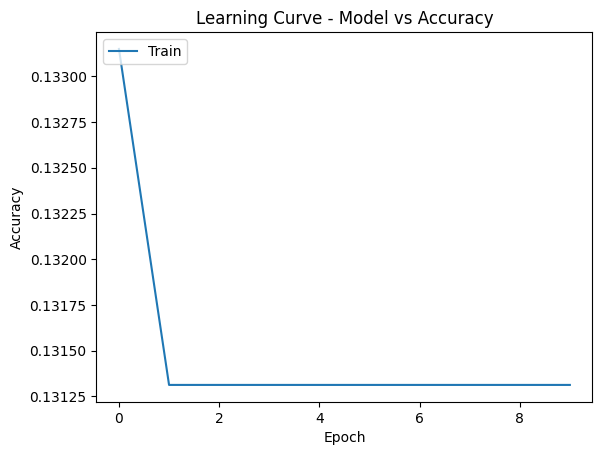

In [14]:
# resnet50
history_resnet50 = model.train(
    model.resnet50,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

#### resnet50V2

c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Encoded Labels in training set: [0 1 2 3 4 5 6 7 8]
Encoded Labels in validation set: [0 1 2 3 4 5 6 7 8]
Epoch 1/10
35/35 [==============================] - 8s 123ms/step - loss: -654.3182 - accuracy: 0.1286 - val_loss: -1837.9379 - val_accuracy: 0.1319
Epoch 2/10
35/35 [==============================] - 3s 72ms/step - loss: -3720.8909 - accuracy: 0.1313 - val_loss: -6557.4155 - val_accuracy: 0.1319
Epoch 3/10
35/35 [==============================] - 2s 71ms/step - loss: -10108.6914 - accuracy: 0.1313 - val_loss: -15159.2715 - val_accuracy: 0.1319
Epoch 4/10
35/35 [==============================] - 2s 68ms/step - loss: -20484.9941 - accuracy: 0.1313 - val_loss: -27960.1074 - val_accuracy: 0.1319
Epoch 5/10
35/35 [==============================] - 2s 68ms/step - loss: -34621.4609 - accuracy: 0.1313 - val_loss: -44189.7734 - val_accuracy: 0.1319
Epoch 6/10
35/35 [==============================] - 2s 68ms/step - loss: -52748.2070 - accuracy: 0.1313 - val_loss: -64739.4883 - val_accuracy:

INFO:tensorflow:Assets written to: ram://906c6180-479c-40c5-a515-c64b5547d599/assets


INFO:tensorflow:Assets written to: ram://906c6180-479c-40c5-a515-c64b5547d599/assets


INFO:tensorflow:Assets written to: ram://a83b82ef-81b5-49b8-a6bd-60805b7400d2/assets


INFO:tensorflow:Assets written to: ram://a83b82ef-81b5-49b8-a6bd-60805b7400d2/assets


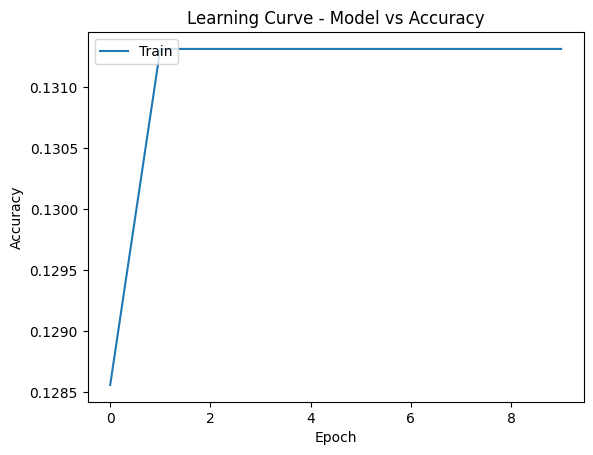

In [15]:
# resnet50V2
history_resnet50V2 = model.train(
    model.resnet50V2,
    X_train=X_train,
    y_train=y_train,
    X_val=X_validation,
    y_val=y_validation
);

### Make Prediction on the Test Set

#### resnet50

In [16]:
# resnet50
y_pred_resnet50 = model.predict(model.resnet50, X_test);
# Inspect the predictions array
print(f"Number of Predictions made: {len(y_pred_resnet50)}");

47/47 [==============================] - 4s 70ms/step
Number of Predictions made: 1480


#### resnet50V2

In [17]:
# resnet50
y_pred_resnet50V2 = model.predict(model.resnet50V2, X_test);
# Inspect the predictions array
print(f"Number of Predictions made: {len(y_pred_resnet50V2)}");

47/47 [==============================] - 4s 64ms/step
Number of Predictions made: 1480


### Performance Evaluation

Print the Confusion Matrix

#### resnet50

In [18]:
confMtx_resnet50 = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50
);
confMtx_resnet50

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


#### resnet50V2

In [19]:
confMtx_resnet50V2 = printConfMtx(
    y_true=y_test,
    y_pred=y_pred_resnet50V2
);
confMtx_resnet50V2

Decoded Labels in Prediction array: ['dor']


c:\Users\kelvi\anaconda3\envs\tf=2.10\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted,cal,dor,hes,iso,mos,pte,swe,yor,zap,All
Actual,,,,,,,,,,
cal,0.0,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171
dor,0.0,194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194
hes,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
iso,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
mos,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
pte,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
swe,0.0,185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,185
yor,0.0,290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,290
zap,0.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150


## Discussion

From the learning curves, we can see that:
- ResNet50 classifier was trained with a dropping accuracy when the number of epochs were enlarging. 
- ResNet50V2 classifier was trained with an increasing accuracy when the number of epochs were enlarging. 
- In either model, the accuracy dropped/increased to a point and remained flat when the number of epochs continued to grow. This means a model failing to learn meaningful patterns in the data.

From the confusion matricies, we can see that:
- Both classifiers give predictions with test samples all being from the same label. 
- Such observation is a sign of class imbalance where there exist biases in the training or validation data.

As a result of the models failing to learn patterns from the data when the number of epochs is large enough, it is therefore a sign of underfitting. 